# Prediction Foot Project
Lorrain MORLET - Julien DE VOS


## Introduction
To introduce the prediction soccer contest, we aim to develop an AI model that can predict the outcome of soccer matches. The goal is to analyze historical data and identify patterns that can help us make accurate predictions.

In this test, we will use some dataset containing information about various soccer matches, including team statistics, player performance, player appearance. Our objective is to train a machine learning model that can classify the result of a match as a win, loss, or draw.

By leveraging advanced algorithms and techniques, we can build a robust AI model that takes into account various factors such as team form, player stats, home advantage, and previous head-to-head records. This model will enable us to make informed predictions and gain valuable insights into the dynamics of soccer matches.

Let's dive into the exciting world of soccer matches prediction and unleash the power of AI in the realm of sports analytics!
### Imports

In [1]:
# all the necessary imports for the project

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

import sklearn.discriminant_analysis as DA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR

import matplotlib.pyplot as plt

import warnings

## Data Exploration

## Feature Engineering

In [5]:
from fonctions_tests import add_manager_win_percentage, add_club_win_percentage_with_referee, add_club_scores, add_price_players, add_updated_stats_players_team_mean

warnings.filterwarnings("ignore")

data = pd.read_csv("./data/matchs_2013_2022.csv")

add_manager_win_percentage(data)
add_club_win_percentage_with_referee(data)

# je crois que les 2 sont globalement la meme chose mais au pire on pourra dire que osef et on en retirera une apres
add_club_scores(data)
add_price_players(data)

add_updated_stats_players_team_mean(data)

data.head()

,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,transfer_home_team,transfer_away_team,home_club_avg_goals_per_game_updated,home_club_avg_assists_per_game_updated,home_club_avg_yellow_cards_per_game_updated,home_club_avg_red_cards_per_game_updated,away_club_avg_goals_per_game_updated,away_club_avg_assists_per_game_updated,away_club_avg_yellow_cards_per_game_updated,away_club_avg_red_cards_per_game_updated
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,12850.0,480.0,23.579692,18.422916,61.750455,0.956715,14.952992,15.685339,45.030063,3.672756
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,0.0,3700.0,17.559406,10.052019,44.110488,1.499979,15.905138,14.907099,52.706016,0.982975
2,14,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,...,2520.0,3650.0,9.672593,10.773536,41.699589,3.487114,55.996558,29.430345,63.389242,1.314765
3,15,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,...,62100.0,0.0,45.792055,24.718132,48.306784,1.909770,17.559406,10.052019,44.110488,1.499979
4,16,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,...,0.0,62100.0,20.571681,13.389672,40.557162,2.557308,45.792055,24.718132,48.306784,1.909770


In [6]:
X = data.drop(columns=["stadium","aggregate","attendance","competition_type","results","referee","home_club_formation","away_club_formation","home_club_name","away_club_name","Unnamed: 0", "season","round","date","home_club_manager_name","away_club_manager_name","home_club_goals", "away_club_goals","home_club_position","away_club_position"])
y = data[["results"]]
X.head()

,game_id,home_club_id,away_club_id,home_club_manager_win_percentage,away_club_manager_win_percentage,home_club_win_percentage_with_referee,away_club_win_percentage_with_referee,score_away_team,score_home_team,transfer_home_team,transfer_away_team,home_club_avg_goals_per_game_updated,home_club_avg_assists_per_game_updated,home_club_avg_yellow_cards_per_game_updated,home_club_avg_red_cards_per_game_updated,away_club_avg_goals_per_game_updated,away_club_avg_assists_per_game_updated,away_club_avg_yellow_cards_per_game_updated,away_club_avg_red_cards_per_game_updated
0,2330874,618,595,0.571429,0.166667,0.217391,0.333333,81.567038,188.724000,12850.0,480.0,23.579692,18.422916,61.750455,0.956715,14.952992,15.685339,45.030063,3.672756
1,2330880,14171,855,0.393939,0.254237,0.428571,0.200000,74.769105,31.855883,0.0,3700.0,17.559406,10.052019,44.110488,1.499979,15.905138,14.907099,52.706016,0.982975
2,2330916,1423,1082,0.214286,0.276923,0.200000,0.500000,244.679289,23.689626,2520.0,3650.0,9.672593,10.773536,41.699589,3.487114,55.996558,29.430345,63.389242,1.314765
3,2331018,273,14171,0.313433,0.178218,0.461538,0.200000,31.855883,371.824554,62100.0,0.0,45.792055,24.718132,48.306784,1.909770,17.559406,10.052019,44.110488,1.499979
4,2331034,1147,273,0.166667,0.338235,0.500000,0.387097,371.824554,57.169593,0.0,62100.0,20.571681,13.389672,40.557162,2.557308,45.792055,24.718132,48.306784,1.909770


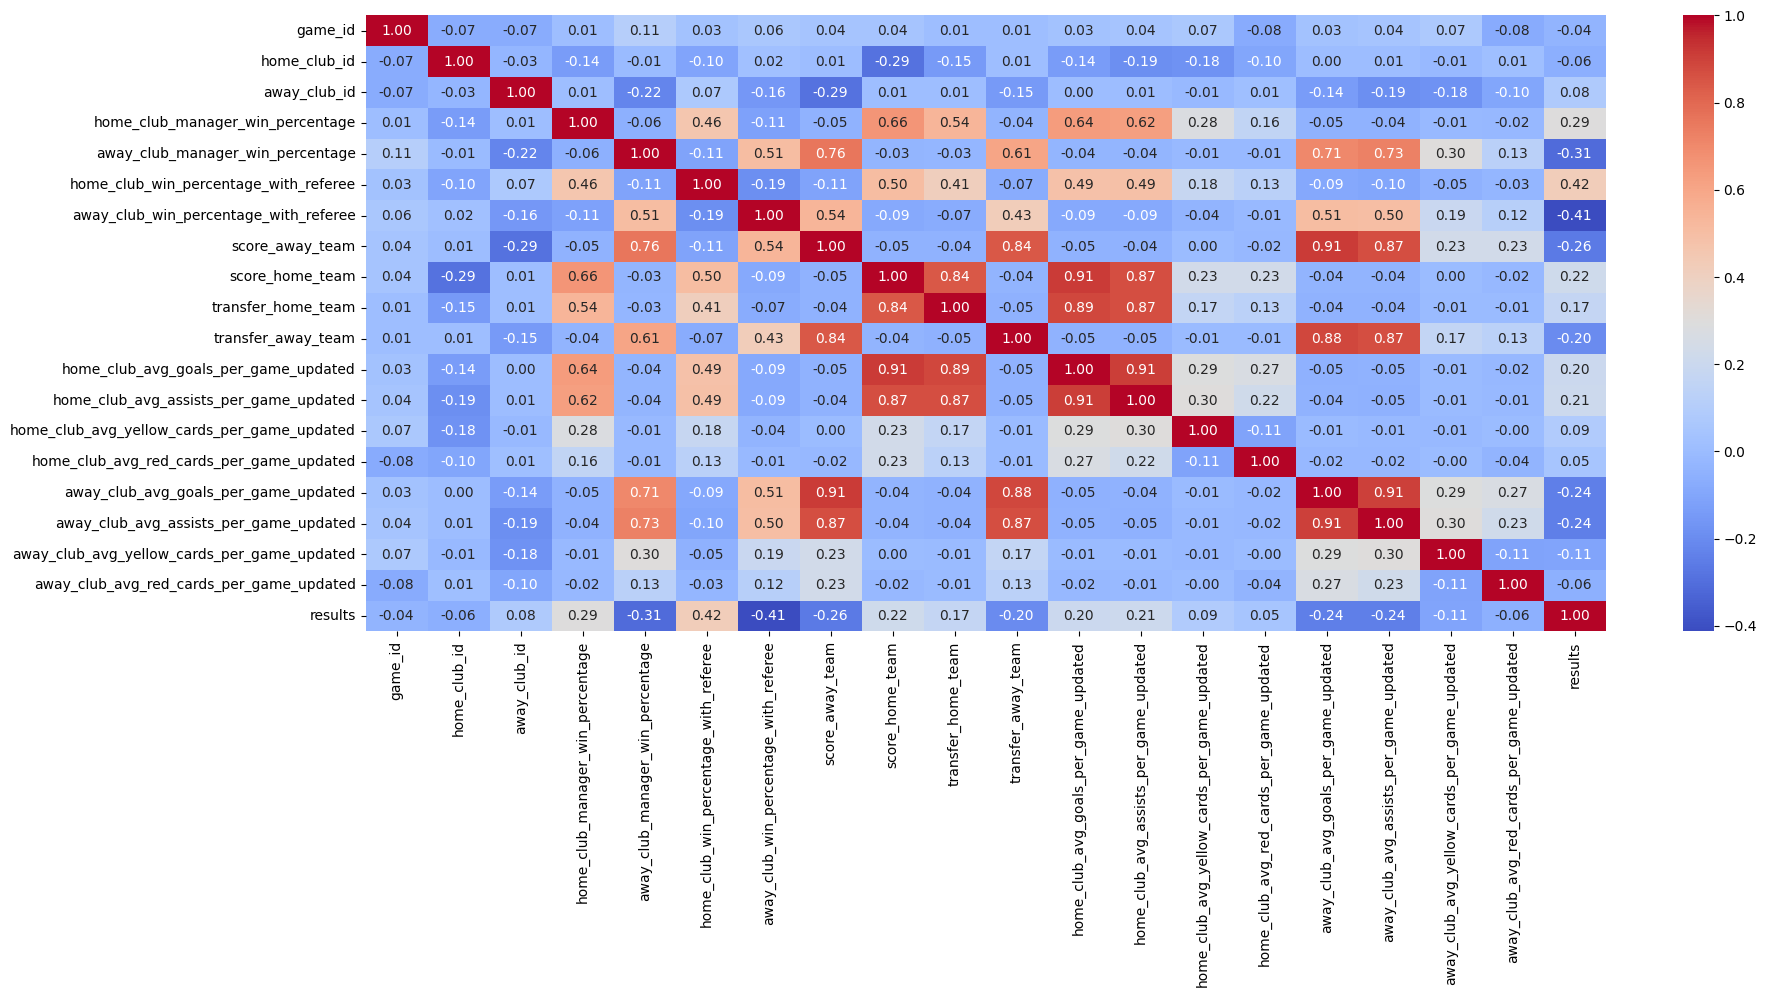

In [7]:
import seaborn as sns

def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()

corr_mat = pd.DataFrame(X)
corr_mat['results'] = y
plot_correlation_matrix(corr_mat)